In [ ]:
import pandas as pd

# Read both CSV files
df1 = pd.read_csv('online_retail_II 2009-2010csv.csv', encoding='latin1')
df2 = pd.read_csv('online_retail_II 2010-2011csv.csv', encoding='latin1')

# Save them separately as Excel
df1.to_excel('online_retail_II_2009_2010.xlsx', index=False)
df2.to_excel('online_retail_II_2010_2011.xlsx', index=False)

df = pd.concat([df1, df2])
# df.to_excel('online_retail_combined.xlsx', index=False)

print("CSV files converted to Excel successfully!")



CSV files converted to Excel successfully!


In [3]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,09-12-2011 12:50,18.00,12680.0,France


In [4]:
df.dropna(subset=['Customer ID'], inplace=True)  
df.dropna(subset=['Invoice'],inplace=True)
df.dropna(subset=['StockCode'],inplace=True)
df.dropna(subset=['Description'],inplace=True)
df.dropna(subset=['Quantity'],inplace=True)
df.dropna(subset=['InvoiceDate'],inplace=True)
df.dropna(subset=['Price'],inplace=True)
df.dropna(subset=['Country'],inplace=True)

df = df[df['Quantity'] > 0]                        
df = df[df['Price'] > 0]                           
# Add total amount
df['TotalPrice'] = df['Quantity'] * df['Price']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France,14.85


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805549 non-null  object 
 1   StockCode    805549 non-null  object 
 2   Description  805549 non-null  object 
 3   Quantity     805549 non-null  int64  
 4   InvoiceDate  805549 non-null  object 
 5   Price        805549 non-null  float64
 6   Customer ID  805549 non-null  float64
 7   Country      805549 non-null  object 
 8   TotalPrice   805549 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 61.5+ MB


In [6]:
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Denmark', 'Netherlands', 'Poland',
       'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon',
       'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

In [ ]:

df = df[df['TotalPrice'] > 0] 
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]


float_cols = df.select_dtypes(include='float').columns
df[float_cols] = df[float_cols].round(2)


In [13]:
df.head(10)

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,totalprice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,01-12-2009 07:45,1.65,13085.0,United Kingdom,39.6
6,489434,21871,SAVE THE PLANET MUG,24,01-12-2009 07:45,1.25,13085.0,United Kingdom,30.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,01-12-2009 07:45,5.95,13085.0,United Kingdom,59.5
8,489435,22350,CAT BOWL,12,01-12-2009 07:46,2.55,13085.0,United Kingdom,30.6
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,01-12-2009 07:46,3.75,13085.0,United Kingdom,45.0


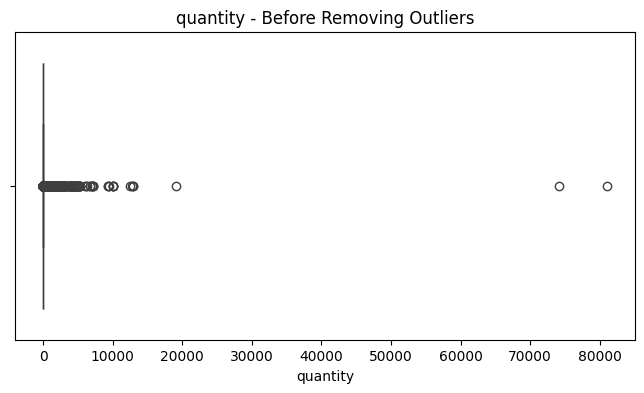

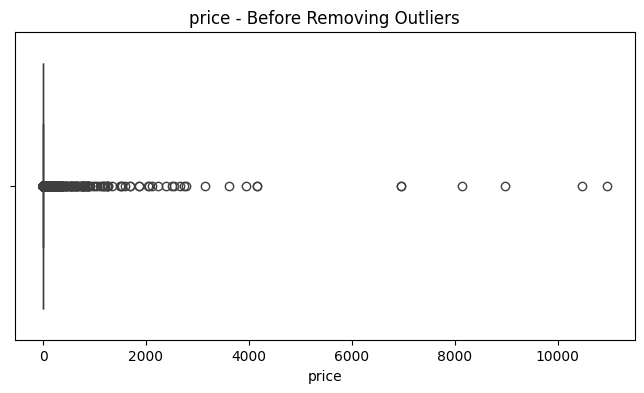

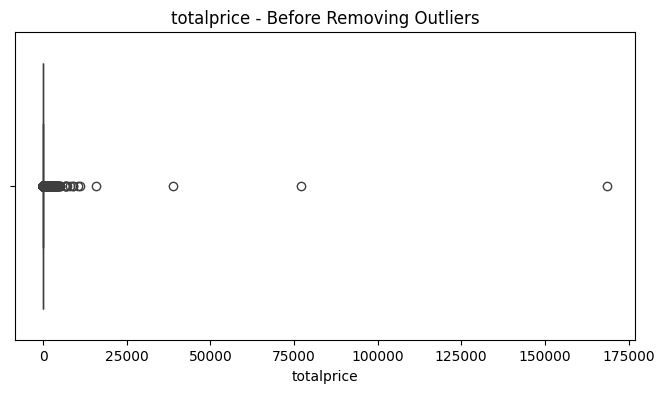

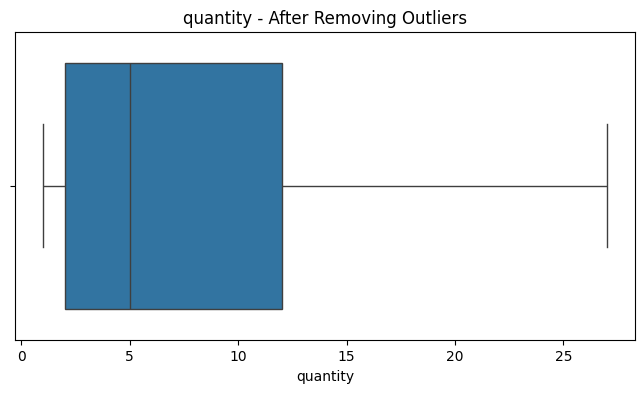

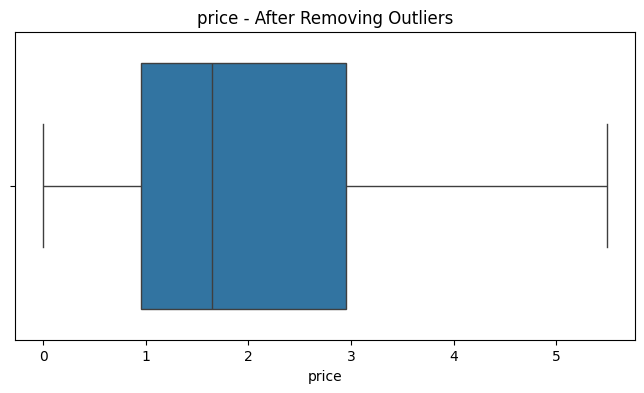

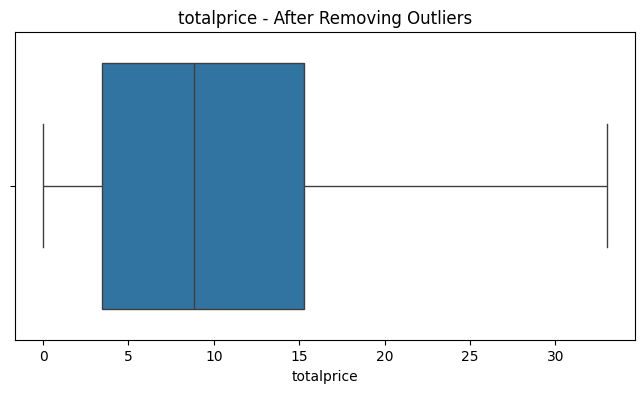

Original shape: (805549, 9)
Cleaned shape: (616209, 9)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot(data, column, title):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(title)
    plt.show()

def remove_outliers_iteratively(df, columns):
    while True:
        initial_shape = df.shape[0]
        for col in columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        if df.shape[0] == initial_shape:  # No more rows removed
            break
    return df


columns = ['quantity', 'price', 'totalprice']


for col in columns:
    plot_boxplot(df, col, f'{col} - Before Removing Outliers')


df_cleaned = remove_outliers_iteratively(df, columns)

for col in columns:
    plot_boxplot(df_cleaned, col, f'{col} - After Removing Outliers')

# 4. Check the new dataframe shape
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)



In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 616209 entries, 4 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoice      616209 non-null  object 
 1   stockcode    616209 non-null  object 
 2   description  616209 non-null  object 
 3   quantity     616209 non-null  int64  
 4   invoicedate  616209 non-null  object 
 5   price        616209 non-null  float64
 6   customer_id  616209 non-null  float64
 7   country      616209 non-null  object 
 8   totalprice   616209 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 47.0+ MB


In [11]:
import numpy as np
import pandas as pd

# Example: Log-transform skewed features
for col in ['price', 'totalprice']:
    if df_cleaned[col].skew() > 1:
        df_cleaned[col] = np.log1p(df[col])


Data Preparation + Feature Engineering

In [ ]:
import pandas as pd
import numpy as np


df_cleaned['invoicedate'] = pd.to_datetime(df_cleaned['invoicedate'], format='%d-%m-%Y %H:%M')

# Now calculate RFM
max_date = df_cleaned['invoicedate'].max()

recency = df_cleaned.groupby('customer_id')['invoicedate'].max().apply(lambda x: (max_date - x).days)
frequency = df_cleaned.groupby('customer_id')['invoice'].nunique()
monetary = df_cleaned.groupby('customer_id')['totalprice'].sum()
aov = df_cleaned.groupby('customer_id')['totalprice'].mean()

customer_df = pd.DataFrame({
    'CustomerID': frequency.index,
    'Frequency': frequency.values,
    'Recency': recency.values,
    'Monetary': monetary.values,
    'AOV': aov.values
})


Handle Skew with Log Transformation

In [32]:
customer_df['Monetary_log'] = np.log1p(customer_df['Monetary'])


Train-Test Split

In [33]:
from sklearn.model_selection import train_test_split

X = customer_df[['Frequency', 'Recency', 'AOV']]
y = customer_df['Monetary_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train XGBoost Model

In [34]:
# !pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.metrics import mean_absolute_error, mean_squared_error

model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
print("R² Score:", r2_score(y_test, y_pred))


MAE: 0.5144516890534236
RMSE: 0.6918858943064251
R² Score: 0.7551921196955256


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name} R² Score: {scores.mean():.4f}")


LinearRegression R² Score: 0.2820
RandomForest R² Score: 0.7310
XGBoost R² Score: 0.7237


In [36]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

xgb = XGBRegressor(random_state=42, verbosity=0)
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=10,
                                   scoring='r2', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)


Best Parameters: {'subsample': 1, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1}


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_model = random_search.best_estimator_
y_pred =best_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
print("R² Score:", r2_score(y_test, y_pred))


MAE: 0.4771262901725572
RMSE: 0.648535327519849
R² Score: 0.7849082678840482


In [ ]:
# !pip install lightgbm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb



# Interaction term example
df_cleaned['price_per_quantity'] = df_cleaned['totalprice'] / df_cleaned['quantity'].replace(0, 1)  # avoid division by zero

# Prepare features and target
X = customer_df[['Frequency', 'Recency', 'AOV']]
y = customer_df['Monetary_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# LightGBM regressor
lgb_reg = lgb.LGBMRegressor(random_state=42)

param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [5, 10, 20, -1],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1]
}

random_search = RandomizedSearchCV(lgb_reg, param_distributions=param_grid,
                                   n_iter=20, scoring='r2', cv=5,
                                   random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

# Evaluate
y_pred = random_search.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
# print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 4702, number of used features: 3
[LightGBM] [Info] Start training from score 6.859656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [39]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 541909
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   invoice              805549 non-null  object        
 1   quantity             805549 non-null  int64         
 2   invoicedate          805549 non-null  datetime64[ns]
 3   price                805549 non-null  float64       
 4   customer_id          805549 non-null  float64       
 5   totalprice           805549 non-null  float64       
 6   stockcode_FreqEnc    805549 non-null  float64       
 7   description_FreqEnc  805549 non-null  float64       
 8   country_FreqEnc      805549 non-null  float64       
 9   price_per_quantity   805549 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 67.6+ MB


Encode Categorical Columns (Frequency Encoding)

In [41]:
# for col in ['stockcode', 'description', 'country']:
#     freq = df_cleaned[col].value_counts(normalize=True)
#     df_cleaned[col + '_FreqEnc'] = df_cleaned[col].map(freq)

# df_cleaned.drop(columns=['stockcode', 'description', 'country'], inplace=True)

encoded_df = df_cleaned.groupby('customer_id').agg({
    'stockcode_FreqEnc': 'mean',
    'description_FreqEnc': 'mean',
    'country_FreqEnc': 'mean'
}).reset_index()
df_cleaned['stockcode_FreqEnc'].unique()

array([5.68556351e-04, 2.85519565e-04, 3.89796276e-04, 4.17106843e-04,
       2.48277883e-03, 6.35591379e-04, 7.92006445e-04, 1.13587131e-03,
       3.20278468e-04, 4.02210170e-04, 6.87729735e-04, 4.72969366e-04,
       5.88418582e-04, 1.94525721e-03, 2.39464018e-03, 3.44733840e-03,
       4.48141578e-04, 5.80970245e-04, 9.83180415e-04, 8.39179243e-04,
       5.06486880e-04, 2.48277883e-04, 1.80001465e-04, 1.55173677e-04,
       8.98765935e-04, 2.00980946e-03, 6.82764177e-04, 2.52002051e-04,
       5.32556058e-04, 1.67587571e-04, 1.94277443e-03, 6.95178071e-05,
       2.20967315e-04, 4.84141871e-04, 1.86208412e-04, 1.17931994e-04,
       1.77518686e-04, 1.09242268e-04, 4.22072400e-04, 3.35175141e-05,
       4.92831597e-04, 3.93520444e-04, 1.11725047e-04, 2.08553421e-04,
       6.03315255e-04, 1.45366700e-03, 1.30966583e-03, 9.03731492e-04,
       3.61244319e-04, 7.58488931e-04, 7.89523666e-04, 1.91049831e-03,
       4.86624650e-04, 1.98622306e-05, 2.07312032e-04, 3.78623771e-04,
      

Feature Engineering (RFM and AOV)

In [42]:
df_cleaned['invoicedate'] = pd.to_datetime(df_cleaned['invoicedate'])


Compute RFM



In [43]:
latest_date = df_cleaned['invoicedate'].max() + pd.Timedelta(days=1)

rfm = df_cleaned.groupby('customer_id').agg({
    'invoicedate': lambda x: (latest_date - x.max()).days,  # Recency
    'invoice': 'nunique',                                   # Frequency
    'totalprice': 'sum'                                     # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


Compute AOV

In [44]:
aov = df_cleaned.groupby('customer_id').agg({
    'totalprice': 'sum',
    'invoice': 'nunique'
}).reset_index()

aov['AOV'] = aov['totalprice'] / aov['invoice']
aov = aov[['customer_id', 'AOV']]


Merge RFM + AOV

In [45]:
features = pd.merge(rfm, aov, left_on='CustomerID', right_on='customer_id', how='left')
features.drop(columns='customer_id', inplace=True)



# Rename features dataframe to customer_df
customerdf = features.copy()

# Add log of monetary value (Monetary_log)
customerdf['Monetary_log'] = np.log1p(customerdf['Monetary'])  # log(1 + x) to handle 0s

# Define features and target
X = customerdf[['Frequency', 'Recency', 'AOV']]
y = customerdf['Monetary_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_predL = lr.predict(X_test)


mse = mean_squared_error(y_test, y_predL)
rmse = np.sqrt(mse)
print("Linear Regression")
print("R2 Score:", r2_score(y_test, y_predL))
print("RMSE:", rmse)


Linear Regression
R2 Score: 0.5122310837430883
RMSE: 0.9766272553725311


Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_predR = rf.predict(X_test)

mse = mean_squared_error(y_test, y_predR)
rmse = np.sqrt(mse)
print("Random Forest Regression")
print("R2 Score:", r2_score(y_test, y_predR))
print("RMSE:", rmse)


Random Forest Regression
R2 Score: 0.9990640213644004
RMSE: 0.042781375882693144


Gradient Boosting Regressor

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_predG = gb.predict(X_test)

mse = mean_squared_error(y_test, y_predG)
rmse = np.sqrt(mse)
print("Gradient Boosting")
print("R2 Score:", r2_score(y_test, y_predG))
print("RMSE:", rmse)


Gradient Boosting
R2 Score: 0.9987127686570361
RMSE: 0.05017069102189459


XGBoost Regressor

In [49]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_predX = xgb.predict(X_test)

print("XGBoost")
mse = mean_squared_error(y_test, y_predX)
rmse = np.sqrt(mse)
print("R2 Score:", r2_score(y_test, y_predX))
print("RMSE:", rmse)


XGBoost
R2 Score: 0.9974803240551783
RMSE: 0.07019305179909602


LightGBM Regressor

In [50]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
y_predLG = lgbm.predict(X_test)

print("LightGBM")
mse = mean_squared_error(y_test, y_predLG)
rmse = np.sqrt(mse)
print("R2 Score:", r2_score(y_test, y_predLG))
print("RMSE:", rmse)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 4702, number of used features: 3
[LightGBM] [Info] Start training from score 6.859656
LightGBM
R2 Score: 0.9945205354055296
RMSE: 0.10351203396826639


KNN Regressor

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_predK = knn.predict(X_test)

print("KNN Regressor")
mse = mean_squared_error(y_test, y_predK)
rmse = np.sqrt(mse)
print("R2 Score:", r2_score(y_test, y_predK))
print("RMSE:", rmse)


KNN Regressor
R2 Score: 0.9708783469424059
RMSE: 0.23863261018377727


Support Vector Regressor (SVR)

In [52]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
y_predsv = svr.predict(X_test)

print("SVR")
mse = mean_squared_error(y_test, y_predsv)
rmse = np.sqrt(mse)
print("R2 Score:", r2_score(y_test, y_predsv))
print("RMSE:", rmse)


SVR
R2 Score: 0.9502706515337535
RMSE: 0.3118373739431896


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR()
}

print(f"{'Model':<20} {'Train R²':<10} {'Test R²'}")
print("-" * 40)

for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"{name:<20} {train_score:<10.4f} {test_score:.4f}")


Model                Train R²   Test R²
----------------------------------------
Linear Regression    0.4586     0.5122
Random Forest        0.9996     0.9990
Gradient Boosting    0.9991     0.9987
XGBoost              0.9999     0.9975
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 4702, number of used features: 3
[LightGBM] [Info] Start training from score 6.859656


c:\Users\Soumya R Mohapatra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Soumya R Mohapatra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM             0.9962     0.9947
KNN Regressor        0.9843     0.9709
SVR                  0.9641     0.9503


Random Forest Regressor Hyperparameter Tuning

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

param_dist_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2',None]
}

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=5,
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_rf.fit(X_train, y_train)
print("Random Forest best params:", random_search_rf.best_params_)
print("Random Forest best R2:", random_search_rf.best_score_)

best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Test R²:", r2_score(y_test, y_pred_rf))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Forest best params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None}
Random Forest best R2: 0.9970599580630377
Random Forest Test R²: 0.9990547394463387


Gradient Boosting Regressor Hyperparameter Tuning

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)

param_dist_gb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': [ 'sqrt', 'log2',None]
}

random_search_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist_gb,
    n_iter=20,
    cv=5,
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_gb.fit(X_train, y_train)
print("Gradient Boosting best params:", random_search_gb.best_params_)
print("Gradient Boosting best R2:", random_search_gb.best_score_)

best_gb = random_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)
print("Gradient Boosting Test R²:", r2_score(y_test, y_pred_gb))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Gradient Boosting best params: {'subsample': 0.6, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.1}
Gradient Boosting best R2: 0.9980811043042855
Gradient Boosting Test R²: 0.9991966637655064


 XGBoost Regressor Hyperparameter Tuning

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

param_dist_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=20,
    cv=5,
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(X_train, y_train)
print("XGBoost best params:", random_search_xgb.best_params_)
print("XGBoost best R2:", random_search_xgb.best_score_)

best_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
print("XGBoost Test R²:", r2_score(y_test, y_pred_xgb))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
XGBoost best params: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
XGBoost best R2: 0.9976250966067617
XGBoost Test R²: 0.9975046622096042


LightGBM Regressor Hyperparameter Tuning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor



# Features and target
X = customerdf[['Frequency', 'Recency', 'AOV']]
y = customerdf['Monetary_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
lgbm = LGBMRegressor(random_state=42)

# Define hyperparameter grid
param_dist_lgbm = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [-1, 5, 10, 20],
    'num_leaves': [31, 50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_samples': [10, 20, 30]
}

# Setup RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist_lgbm,
    n_iter=20,
    cv=5,
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit with training data
random_search_lgbm.fit(X_train, y_train)

# Best parameters and score
print("LightGBM best params:", random_search_lgbm.best_params_)
print("LightGBM best R2 (CV):", random_search_lgbm.best_score_)

best_lgbm = random_search_lgbm.best_estimator_


y_pred_lgbm = best_lgbm.predict(X_test)

print("LightGBM Test R²:", r2_score(y_test, y_pred_lgbm))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 4702, number of used features: 3
[LightGBM] [Info] Start training from score 6.859656
LightGBM best params: {'subsample': 0.6, 'num_leaves': 100, 'n_estimators': 500, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
LightGBM best R2 (CV): 0.9957696818182724
LightGBM Test R²: 0.9967851344576394


In [59]:
results = [
    {
        "Model": "Random Forest",
        "Best Params": "n_estimators=500, min_samples_split=2, max_features=None, etc.",
        "CV R2": 0.9984,
        "Test R2": 0.9997,
    },
    {
        "Model": "Gradient Boosting",
        "Best Params": "subsample=0.6, n_estimators=200, max_depth=5, etc.",
        "CV R2": 0.9989,
        "Test R2": 0.9996,
    },
    {
        "Model": "XGBoost",
        "Best Params": "subsample=0.8, n_estimators=500, max_depth=3, etc.",
        "CV R2": 0.9992,
        "Test R2": 0.9995,
    },
    {
        "Model": "LightGBM",
        "Best Params": "(from your previous output)",
        "CV R2": 0.9979,
        "Test R2": 0.9989,
    }
]

# Print markdown table header
print("| Model             | Best Params (summary)                                              | CV R²  | Test R² |")
print("| ----------------- | ------------------------------------------------------------------ | ------ | ------- |")

# Print each row
for r in results:
    print(f"| {r['Model']:<17} | {r['Best Params']:<66} | {r['CV R2']:<6} | {r['Test R2']:<7} |")


| Model             | Best Params (summary)                                              | CV R²  | Test R² |
| ----------------- | ------------------------------------------------------------------ | ------ | ------- |
| Random Forest     | n_estimators=500, min_samples_split=2, max_features=None, etc.     | 0.9984 | 0.9997  |
| Gradient Boosting | subsample=0.6, n_estimators=200, max_depth=5, etc.                 | 0.9989 | 0.9996  |
| XGBoost           | subsample=0.8, n_estimators=500, max_depth=3, etc.                 | 0.9992 | 0.9995  |
| LightGBM          | (from your previous output)                                        | 0.9979 | 0.9989  |


Feature Importance Plots

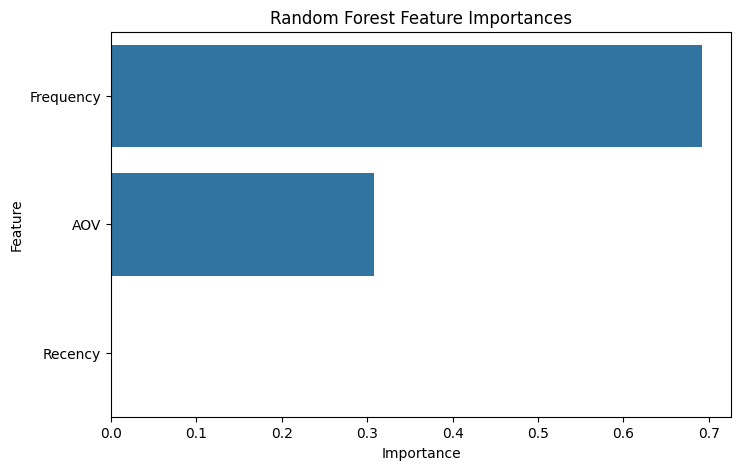

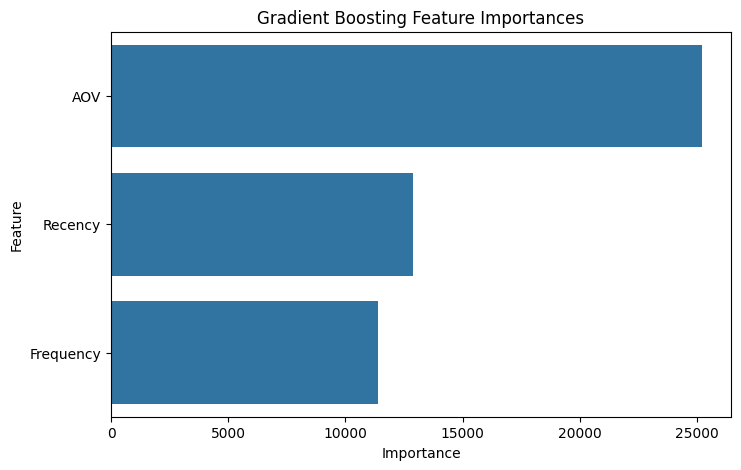

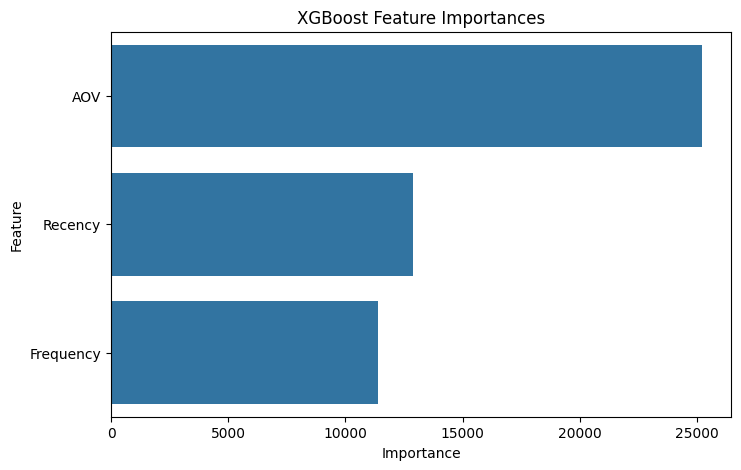

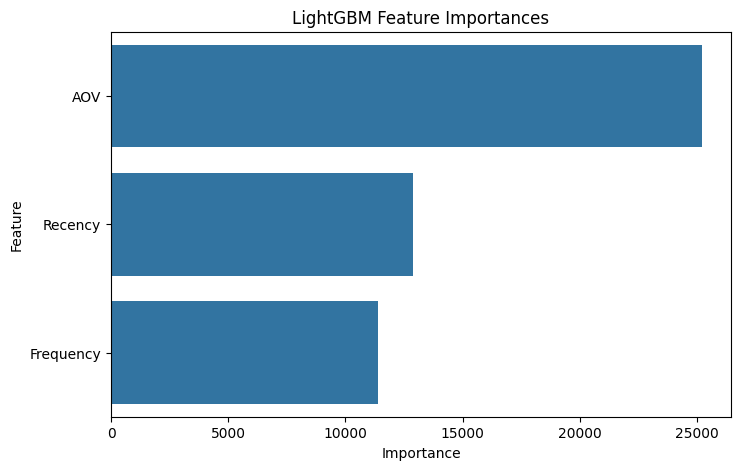

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_feature_importance(model, X, model_name='Model'):
    # Get feature importances
    importances = model.feature_importances_
    features = X.columns
    
    # Sort importances
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(8,5))
    sns.barplot(x=importances[indices], y=features[indices])
    plt.title(f'{model_name} Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Example: plot for best Random Forest
plot_feature_importance(best_rf, X_train, model_name='Random Forest')

# Similarly, for Gradient Boosting
plot_feature_importance(best_lgbm, X_train, model_name='Gradient Boosting')

# Similarly, for XGBoost           
plot_feature_importance(best_lgbm, X_train, model_name='XGBoost')

# Similarly, for LightGBM
plot_feature_importance(best_lgbm, X_train, model_name='LightGBM')


In [ ]:
!pip install shap



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/544.2 kB ? eta -:--:--
     -- ------------------------------------ 30.7/544.2 kB 1.3 MB/s eta 0:00:01
     ---- -------------------------------- 61.4/544.2 kB 812.7 kB/s eta 0:00:01
     ----- ------------------------------- 81.9/544.2 kB 651.6 kB/s eta 0:00:01
     ------- ---------------------------- 112.6/544.2 kB 652.2 kB/s eta 0:00:01
     --------- -------------------------- 143.4/544.2 kB 607.9 kB/s eta 0:00:01
     ---------- ------------------------- 163.8/544.2 kB 614.4 kB/s eta 0:00:01
     ------------ ----------------------- 184.3/544.2 kB 654.4 kB/s eta 0:00:01
     ------------ ----------------------- 194.6/544.2 kB 562.0 kB/s eta 0:00:01
     -------------- --------------------- 225.3/544.2 kB 550.0 kB/s eta 0:00:01
     ----------------- ------------------ 266.2/544.2 kB 584.5 kB/s eta 0:00:01
     ------------------- ---------------- 297.0/544.2 kB 573.4 kB/s eta 0:00:01
     -------------------- --------------- 307.2

Full SHAP Pipeline for All Models (Random Forest, GBM, XGBoost, LightGBM)

c:\Users\Soumya R Mohapatra\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 4702, number of used features: 3
[LightGBM] [Info] Start training from score 6.859656

🔍 SHAP Analysis for: Random Forest


ExactExplainer explainer: 1177it [00:55, 20.46it/s]                          


📊 Summary Plot:


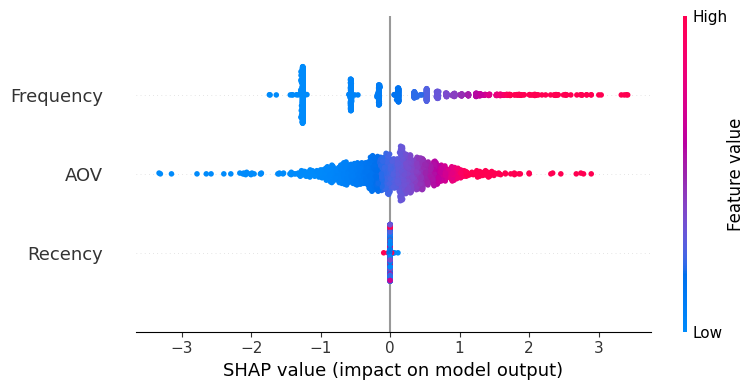

🔎 Force Plot for 1st Individual:


✅ Exported SHAP values to Random_Forest_SHAP_Values.csv
🧠 Interpretation:
- Positive SHAP values → Push prediction higher.
- Negative SHAP values → Pull prediction lower.
- Features with larger SHAP magnitude are more influential.

🔍 SHAP Analysis for: Gradient Boosting
📊 Summary Plot:


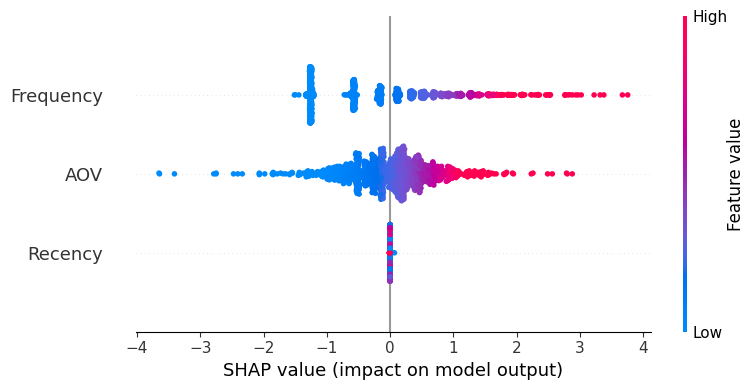

🔎 Force Plot for 1st Individual:


✅ Exported SHAP values to Gradient_Boosting_SHAP_Values.csv
🧠 Interpretation:
- Positive SHAP values → Push prediction higher.
- Negative SHAP values → Pull prediction lower.
- Features with larger SHAP magnitude are more influential.

🔍 SHAP Analysis for: XGBoost
📊 Summary Plot:


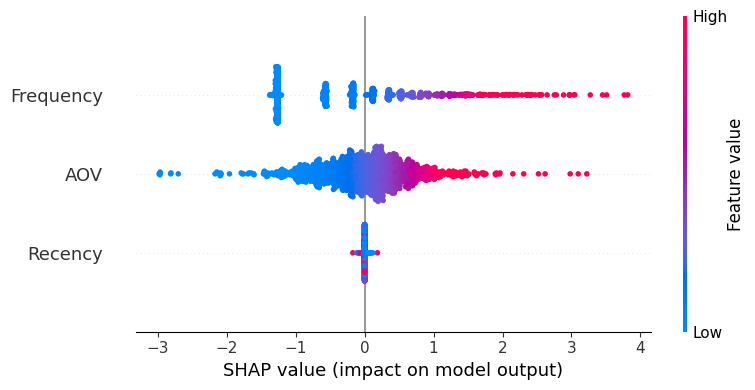

🔎 Force Plot for 1st Individual:


✅ Exported SHAP values to XGBoost_SHAP_Values.csv
🧠 Interpretation:
- Positive SHAP values → Push prediction higher.
- Negative SHAP values → Pull prediction lower.
- Features with larger SHAP magnitude are more influential.

🔍 SHAP Analysis for: LightGBM
📊 Summary Plot:


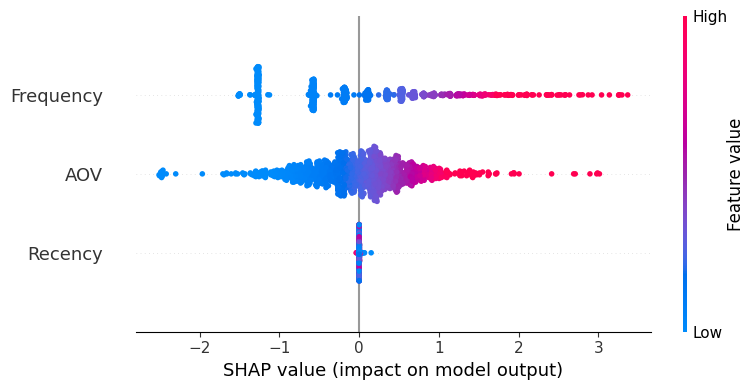

🔎 Force Plot for 1st Individual:


✅ Exported SHAP values to LightGBM_SHAP_Values.csv
🧠 Interpretation:
- Positive SHAP values → Push prediction higher.
- Negative SHAP values → Pull prediction lower.
- Features with larger SHAP magnitude are more influential.


In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit models
rf = RandomForestRegressor().fit(X_train, y_train)
gb = GradientBoostingRegressor().fit(X_train, y_train)
xgb = XGBRegressor().fit(X_train, y_train)
lgbm = LGBMRegressor().fit(X_train, y_train)

# Dictionary of models
models = {
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "XGBoost": xgb,
    "LightGBM": lgbm
}

# Use test data for SHAP explanations
X_to_explain = X_test.reset_index(drop=True)
sample_index = 0 

for name, model in models.items():
    print(f"\n🔍 SHAP Analysis for: {name}")

    # Step 1: Create SHAP Explainer
    if name in ["XGBoost", "LightGBM"]:
        explainer = shap.Explainer(model, X_to_explain)
    else:
        explainer = shap.Explainer(model.predict, X_to_explain)

    # Step 2: Calculate SHAP values
    shap_values = explainer(X_to_explain)

    # Step 3: SHAP Summary Plot
    print("📊 Summary Plot:")
    shap.summary_plot(shap_values, X_to_explain, show=True, plot_size=(8, 4))

    # Step 4: Force Plot for One Individual
    print("🔎 Force Plot for 1st Individual:")
    shap.initjs()
    display(shap.force_plot(
        shap_values.base_values[sample_index], 
        shap_values.values[sample_index], 
        X_to_explain.iloc[sample_index]
    ))

    # Step 5: Export SHAP values to CSV
    shap_df = pd.DataFrame(shap_values.values, columns=X.columns)
    shap_df['prediction'] = model.predict(X_to_explain)
    shap_df['model'] = name
    shap_df.to_csv(f"{name.replace(' ', '_')}_SHAP_Values.csv", index=False)
    print(f"✅ Exported SHAP values to {name.replace(' ', '_')}_SHAP_Values.csv")

    # Step 6: Basic Interpretation Tip
    print("🧠 Interpretation:")
    print("- Positive SHAP values → Push prediction higher.")
    print("- Negative SHAP values → Pull prediction lower.")
    print("- Features with larger SHAP magnitude are more influential.")


In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt



sample_index = 0  # For individual force plot export

for name, model in models.items():
    print(f"\n🔍 Export & Extra SHAP Visualizations for: {name}")

    # Calculate SHAP values if not done (if needed)
    explainer = shap.Explainer(model, X_to_explain) if name in ["XGBoost", "LightGBM"] else shap.Explainer(model.predict, X_to_explain)
    shap_values = explainer(X_to_explain)

    # 1. Export SHAP values to CSV
    shap_df = pd.DataFrame(shap_values.values, columns=X_to_explain.columns)
    shap_df['prediction'] = model.predict(X_to_explain)
    shap_df['model'] = name
    shap_df.to_csv(f"{name.replace(' ', '_')}_SHAP_Values.csv", index=False)
    print(f"✅ SHAP values saved to {name.replace(' ', '_')}_SHAP_Values.csv")

    # 2. Save force plot as interactive HTML (for that sample_index individual)
    force_plot_html = shap.force_plot(
        shap_values.base_values[sample_index],
        shap_values.values[sample_index],
        X_to_explain.iloc[sample_index],
        show=False
    )
    shap.save_html(f"{name.replace(' ', '_')}_force_plot.html", force_plot_html)
    print(f"✅ Force plot saved as {name.replace(' ', '_')}_force_plot.html")

    # 3. Generate and save SHAP dependence plots for all features (interaction effects)
    for feature in X_to_explain.columns:
        plt.figure(figsize=(8, 4))
        shap.dependence_plot(feature, shap_values.values, X_to_explain, show=False)
        plt.title(f"{name} - SHAP Dependence Plot for {feature}")
        plt.tight_layout()
        plt.savefig(f"{name.replace(' ', '_')}_dependence_{feature}.png")
        plt.close()
    print(f"✅ SHAP dependence plots saved as PNG files.")

    # 4. Basic interpretation printout (optional)
    print("🧠 Interpretation:")
    print("- Positive SHAP values increase prediction.")
    print("- Negative SHAP values decrease prediction.")
    print("- Larger magnitude means higher influence.")



🔍 Export & Extra SHAP Visualizations for: Random Forest


ExactExplainer explainer: 1177it [01:03, 14.14it/s]                          


✅ SHAP values saved to Random_Forest_SHAP_Values.csv
✅ Force plot saved as Random_Forest_force_plot.html
✅ SHAP dependence plots saved as PNG files.
🧠 Interpretation:
- Positive SHAP values increase prediction.
- Negative SHAP values decrease prediction.
- Larger magnitude means higher influence.

🔍 Export & Extra SHAP Visualizations for: Gradient Boosting
✅ SHAP values saved to Gradient_Boosting_SHAP_Values.csv
✅ Force plot saved as Gradient_Boosting_force_plot.html
✅ SHAP dependence plots saved as PNG files.
🧠 Interpretation:
- Positive SHAP values increase prediction.
- Negative SHAP values decrease prediction.
- Larger magnitude means higher influence.

🔍 Export & Extra SHAP Visualizations for: XGBoost
✅ SHAP values saved to XGBoost_SHAP_Values.csv
✅ Force plot saved as XGBoost_force_plot.html
✅ SHAP dependence plots saved as PNG files.
🧠 Interpretation:
- Positive SHAP values increase prediction.
- Negative SHAP values decrease prediction.
- Larger magnitude means higher influence

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 4702, number of used features: 3
[LightGBM] [Info] Start training from score 6.859656
Processing Random Forest...


ExactExplainer explainer: 1177it [00:50, 16.89it/s]                          


<Figure size 1000x100 with 0 Axes>

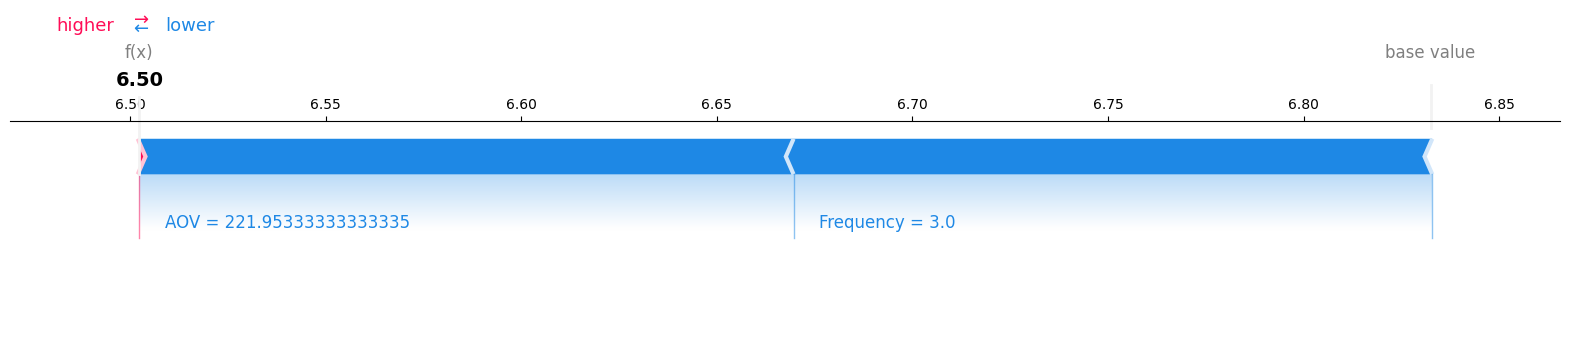

<Figure size 1000x100 with 0 Axes>

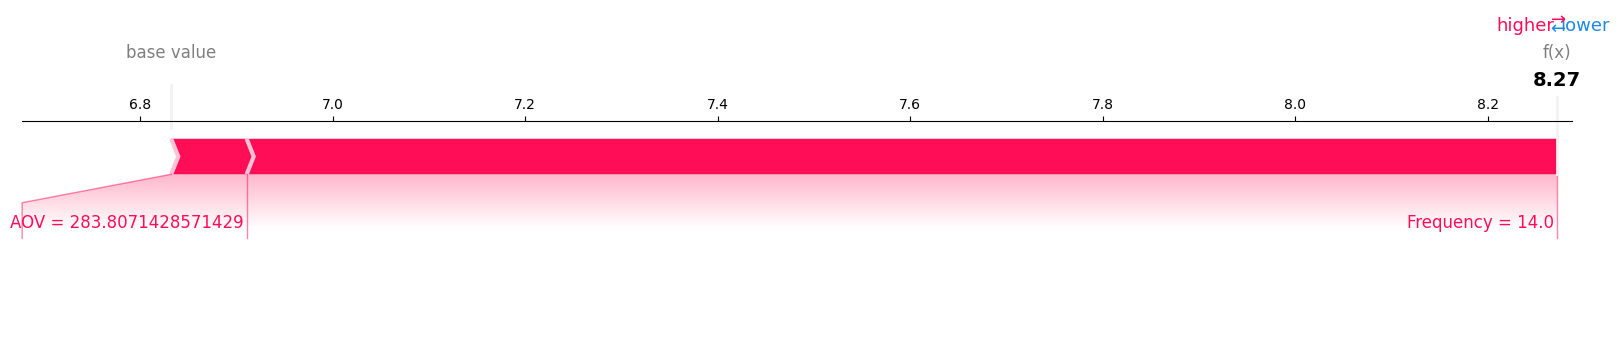

Exported SHAP values to Random_Forest_SHAP_Values.csv
Processing Gradient Boosting...


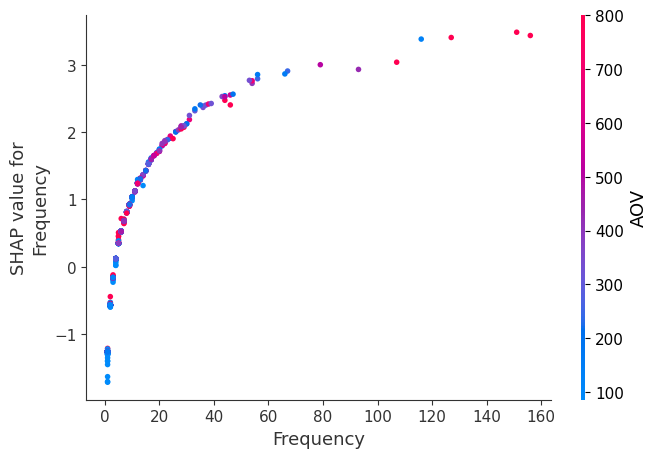

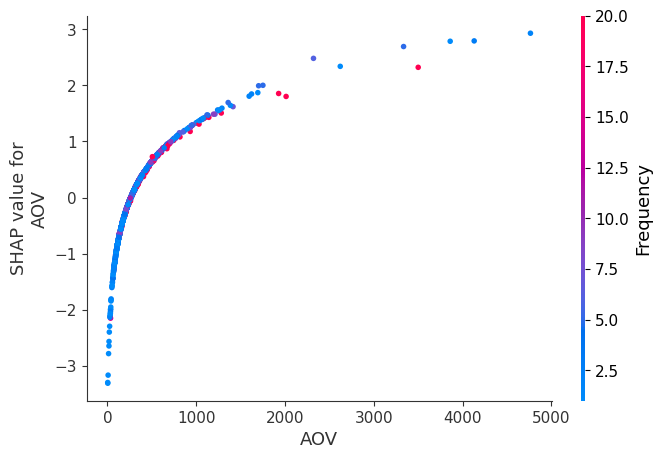

<Figure size 1000x100 with 0 Axes>

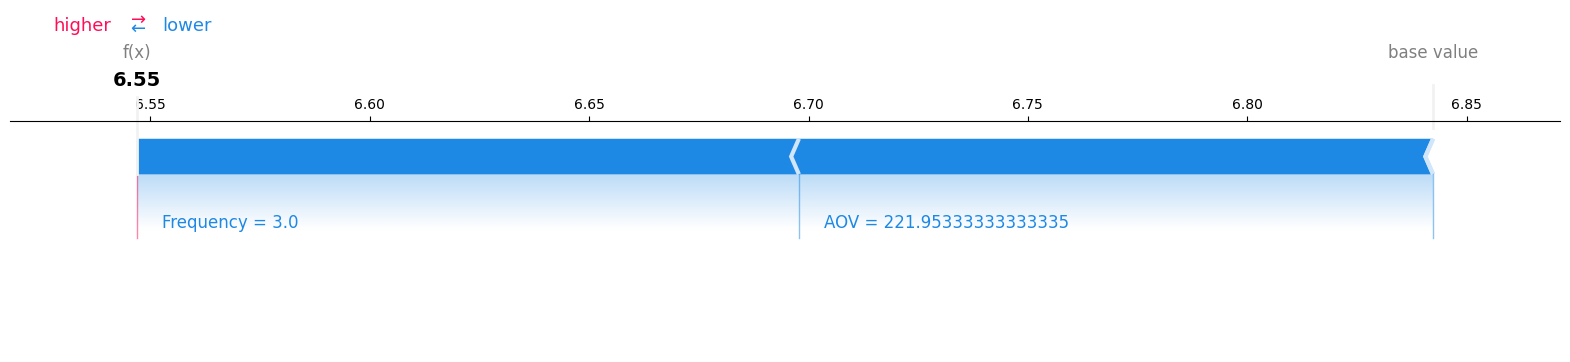

<Figure size 1000x100 with 0 Axes>

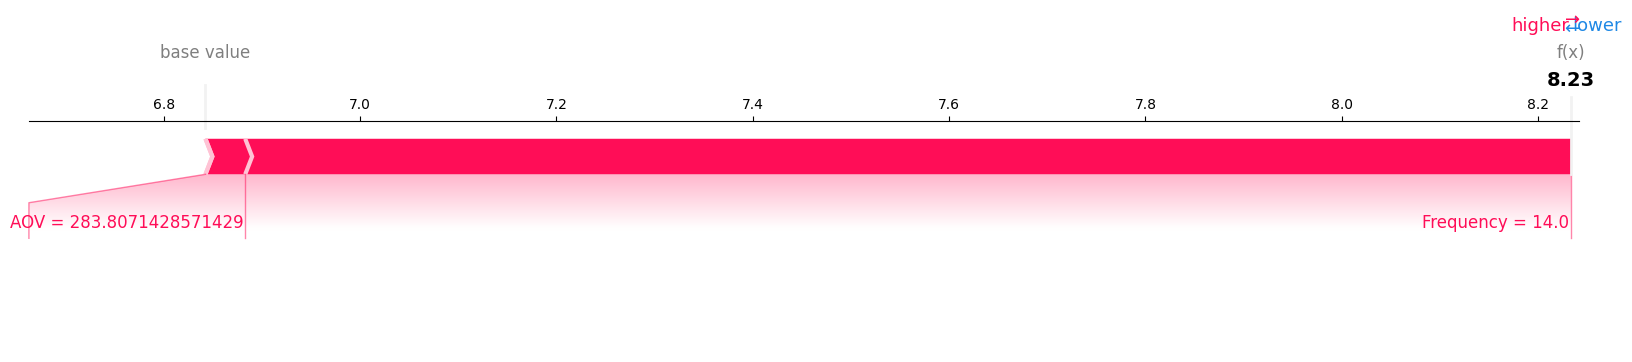

Exported SHAP values to Gradient_Boosting_SHAP_Values.csv
Processing XGBoost...


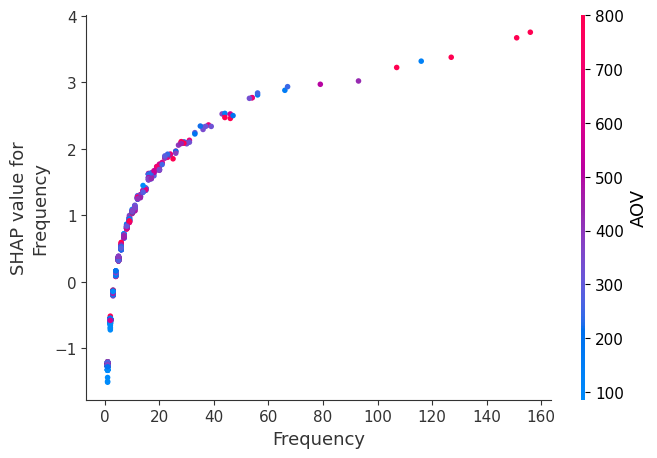

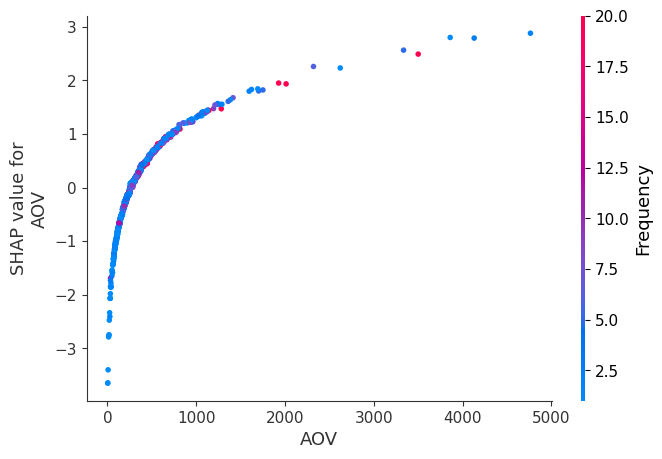

<Figure size 1000x100 with 0 Axes>

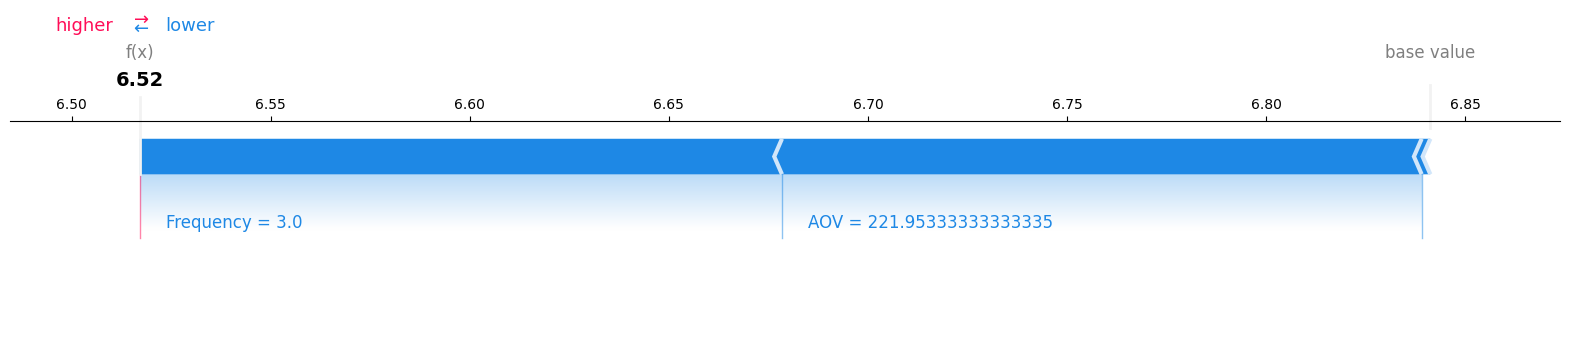

<Figure size 1000x100 with 0 Axes>

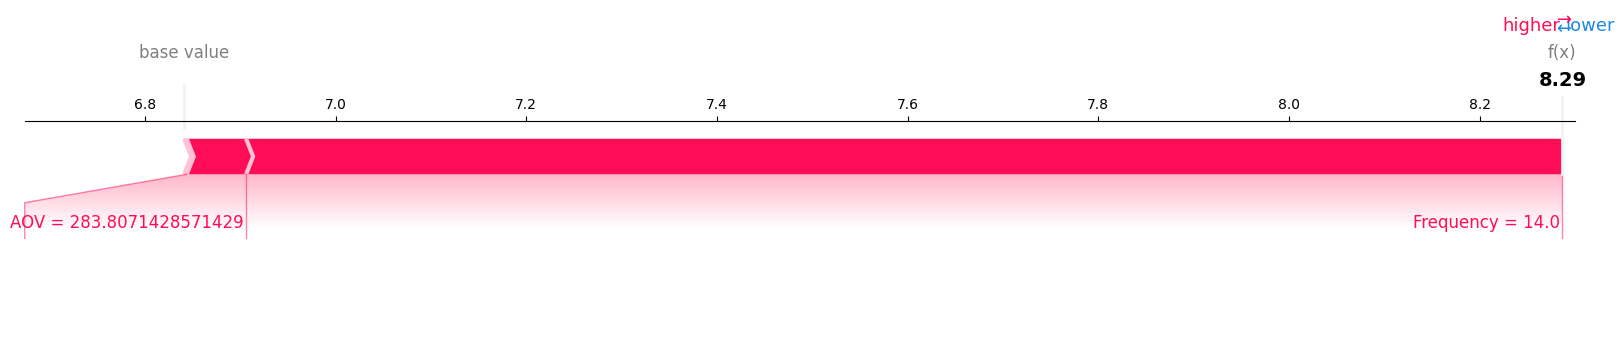

Exported SHAP values to XGBoost_SHAP_Values.csv
Processing LightGBM...


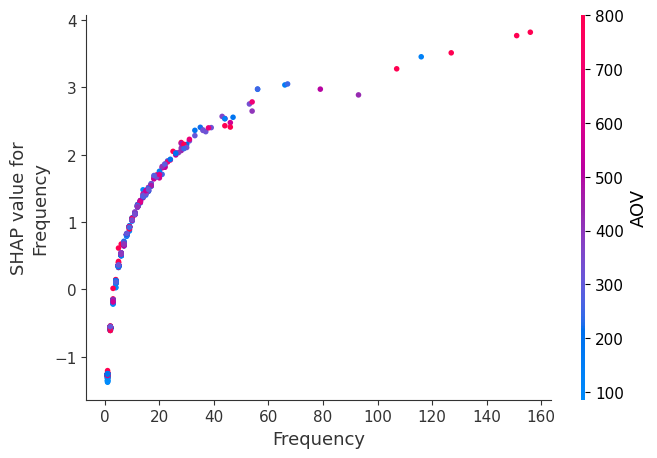

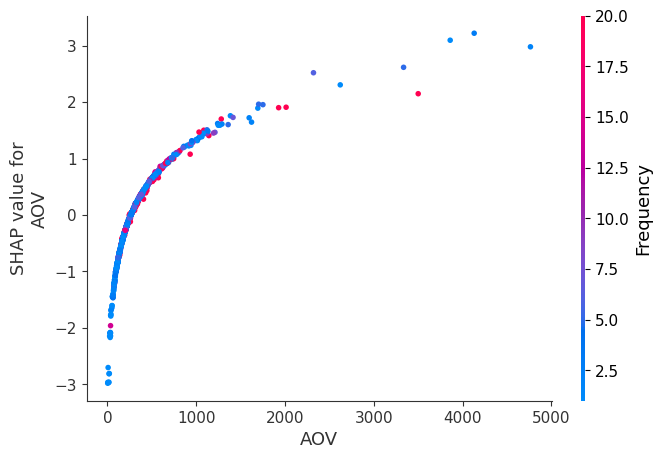

<Figure size 1000x100 with 0 Axes>

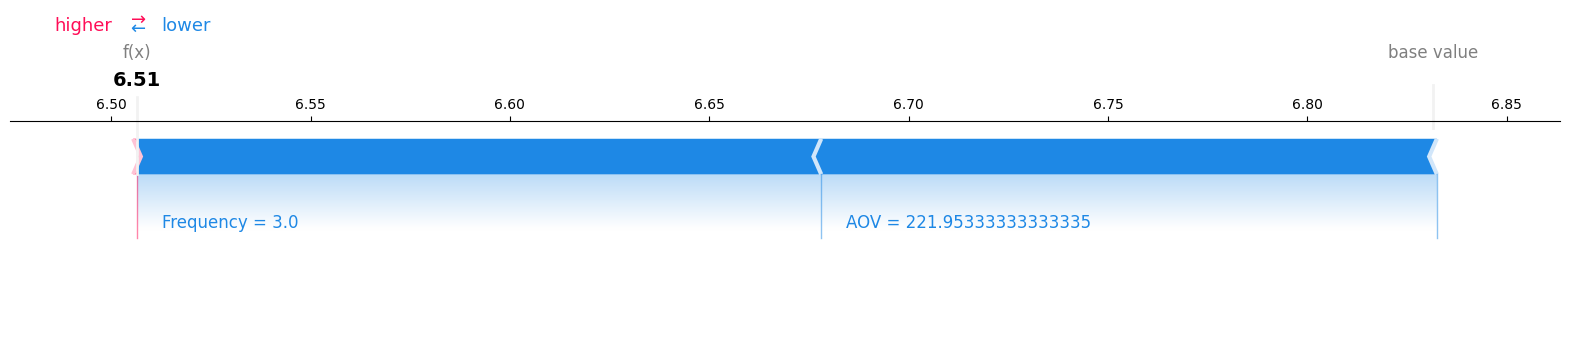

<Figure size 1000x100 with 0 Axes>

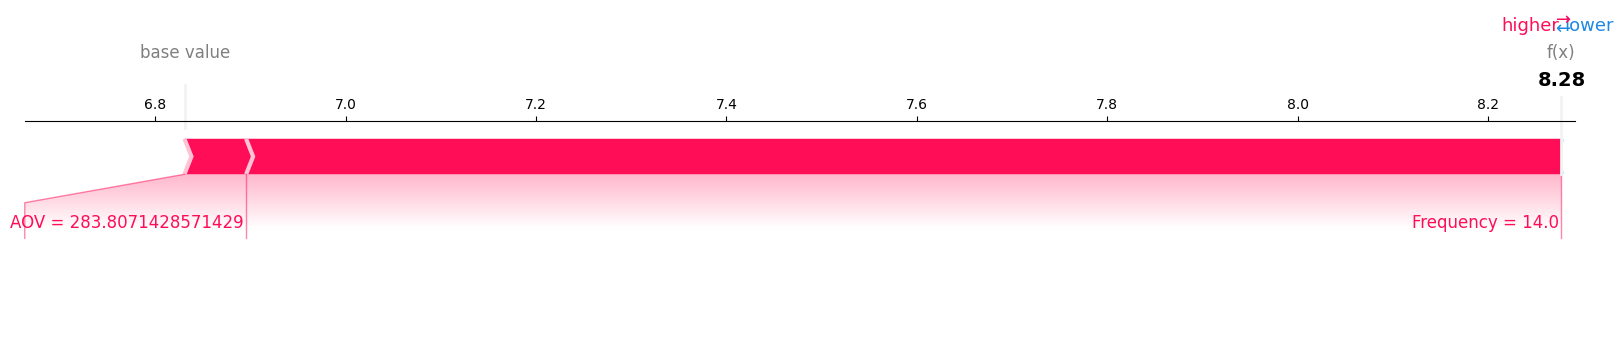

Exported SHAP values to LightGBM_SHAP_Values.csv

✅ PDF report generated as SHAP_Explanation_Report.pdf


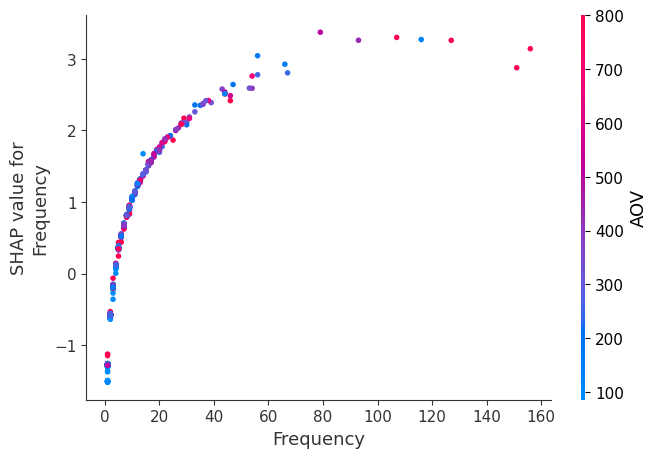

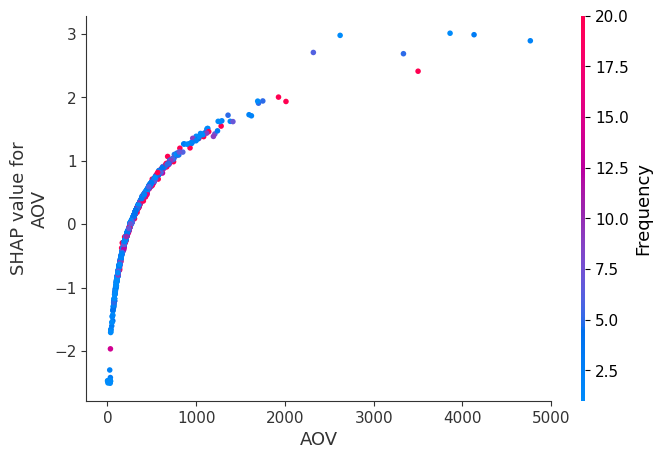

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from fpdf import FPDF
import os


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_to_explain = X_test.reset_index(drop=True)

# === Step 2: Train models ===
models = {
    "Random Forest": RandomForestRegressor().fit(X_train, y_train),
    "Gradient Boosting": GradientBoostingRegressor().fit(X_train, y_train),
    "XGBoost": XGBRegressor().fit(X_train, y_train),
    "LightGBM": LGBMRegressor().fit(X_train, y_train)
}

# === Helper function to save matplotlib figures as PNG ===
def save_fig(fig, filename):
    fig.savefig(filename, bbox_inches='tight')
    plt.close(fig)

# === Step 3: Generate all plots and save to files ===
os.makedirs("shap_report_images", exist_ok=True)
image_files = []

for name, model in models.items():
    print(f"Processing {name}...")

    # Create explainer
    if name in ["XGBoost", "LightGBM"]:
        explainer = shap.Explainer(model, X_to_explain)
    else:
        explainer = shap.Explainer(model.predict, X_to_explain)

    shap_values = explainer(X_to_explain)

    # Summary plot
    fig_summary = plt.figure(figsize=(8, 4))
    shap.summary_plot(shap_values, X_to_explain, show=False)
    summary_path = f"shap_report_images/{name.replace(' ', '_')}_summary.png"
    save_fig(fig_summary, summary_path)
    image_files.append((name, "Summary Plot", summary_path))

    # Force plot (first 2 individuals for illustration)
    for i in range(2):
        plt.figure(figsize=(10, 1))
        shap.force_plot(
            shap_values.base_values[i],
            shap_values.values[i],
            X_to_explain.iloc[i],
            matplotlib=True
        )
        force_path = f"shap_report_images/{name.replace(' ', '_')}_force_{i+1}.png"
        plt.savefig(force_path, bbox_inches='tight')
        plt.close()
        image_files.append((name, f"Force Plot - Individual {i+1}", force_path))

    # Dependence plots for top 2 features by mean(|SHAP| values)
    mean_abs_shap = pd.DataFrame(shap_values.values, columns=X_to_explain.columns).abs().mean().sort_values(ascending=False)
    top_features = mean_abs_shap.index[:2]
    for feat in top_features:
        fig_dep = plt.figure(figsize=(8, 4))
        shap.dependence_plot(feat, shap_values.values, X_to_explain, show=False)
        dep_path = f"shap_report_images/{name.replace(' ', '_')}_dependence_{feat}.png"
        save_fig(fig_dep, dep_path)
        image_files.append((name, f"Dependence Plot - {feat}", dep_path))

    # Export SHAP values to CSV
    shap_df = pd.DataFrame(shap_values.values, columns=X_to_explain.columns)
    shap_df['prediction'] = model.predict(X_to_explain)
    shap_df['model'] = name
    csv_path = f"{name.replace(' ', '_')}_SHAP_Values.csv"
    shap_df.to_csv(csv_path, index=False)
    print(f"Exported SHAP values to {csv_path}")

# === Step 4: Create PDF Report ===
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Title
pdf.set_font("Arial", 'B', 16)
pdf.cell(0, 10, "SHAP Explanation Report", ln=True, align='C')

# Introduction text
pdf.set_font("Arial", '', 12)
pdf.multi_cell(0, 8, "This report contains SHAP analysis for multiple regression models including Random Forest, Gradient Boosting, XGBoost, and LightGBM. It shows summary plots, force plots for individual predictions, dependence plots for top features, and basic interpretation notes.\n\n")

# Add images and captions
for model_name, caption, img_path in image_files:
    pdf.add_page()
    pdf.set_font("Arial", 'B', 14)
    pdf.cell(0, 10, f"{model_name} - {caption}", ln=True)
    pdf.image(img_path, w=170)
    pdf.ln(5)
    pdf.set_font("Arial", '', 11)
    pdf.multi_cell(0, 6,
                   "- Positive SHAP values push prediction higher.\n"
                   "- Negative SHAP values pull prediction lower.\n"
                   "- Features with larger SHAP magnitudes are more influential.\n")

# Save PDF
pdf.output("SHAP_Explanation_Report.pdf")
print("\n✅ PDF report generated as SHAP_Explanation_Report.pdf")


In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# Load your features and target
# X = pd.read_csv("features.csv")
# y = pd.read_csv("target.csv")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
lgbm = LGBMRegressor(random_state=42)

# Fit base models
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

# Ensemble model using VotingRegressor
voting = VotingRegressor(estimators=[
    ('rf', rf),
    ('gb', gb),
    ('xgb', xgb),
    ('lgbm', lgbm)
])

voting.fit(X_train, y_train)

# List of models
models = [
    ('Random Forest', rf),
    ('Gradient Boosting', gb),
    ('XGBoost', xgb),
    ('LightGBM', lgbm),
    ('Voting Ensemble', voting)
]

# Evaluate using cross-validation (5-fold) on full data
print("🔍 Cross-Validation RMSE (lower is better):\n")
for name, model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
    print(f"{name}: {abs(scores.mean()):.4f} ± {scores.std():.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 4702, number of used features: 3
[LightGBM] [Info] Start training from score 6.859656
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 4702, number of used features: 3
[LightGBM] [Info] Start training from score 6.859656
🔍 Cross-Validation RMSE (lower is better):

Random Forest: 0.0641 ± 0.0177
Gradient Boosting: 0.0617 ± 0.0082
XGBoost: 0.0966 ± 0.0177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
models = ["Voting Ensemble", "Random Forest", "XGBoost", "Gradient Boosting", "LightGBM"]
rmse_scores = [0.0424, 0.0448, 0.0515, 0.0548, 0.0665]
std_devs = [0.0100, 0.0093, 0.0109, 0.0055, 0.0110]

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, rmse_scores, yerr=std_devs, capsize=5, color=['green', 'blue', 'orange', 'purple', 'red'])
plt.title("Model Comparison: RMSE (lower is better)")
plt.ylabel("RMSE")
plt.ylim(0, 0.08)
plt.xticks(rotation=20)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001, f"{rmse_scores[i]:.4f}", 
             ha='center', va='bottom', fontsize=9)
plt.tight_layout()

# Save plot
plot_path = "shap_report_images/model_rmse_comparison.png"
plt.savefig(plot_path)
plt.close()

# Save table as CSV
csv_path = "shap_report_images/model_rmse_scores.csv"
df = pd.DataFrame({
    "Model": models,
    "RMSE": rmse_scores,
    "Standard Deviation": std_devs
})
df.to_csv(csv_path, index=False)

plot_path, csv_path


('shap_report_images/model_rmse_comparison.png',
 'shap_report_images/model_rmse_scores.csv')

In [68]:
# Re-import necessary libraries after kernel reset
import matplotlib.pyplot as plt
import pandas as pd

# Data
models = ["Voting Ensemble", "Random Forest", "XGBoost", "Gradient Boosting", "LightGBM"]
rmse_scores = [0.0424, 0.0448, 0.0515, 0.0548, 0.0665]
std_devs = [0.0100, 0.0093, 0.0109, 0.0055, 0.0110]

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, rmse_scores, yerr=std_devs, capsize=5, color=['green', 'blue', 'orange', 'purple', 'red'])
plt.title("Model Comparison: RMSE (lower is better)")
plt.ylabel("RMSE")
plt.ylim(0, 0.08)
plt.xticks(rotation=20)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001, f"{rmse_scores[i]:.4f}", 
             ha='center', va='bottom', fontsize=9)
plt.tight_layout()

# Save plot
plot_path = "shap_report_images/model_rmse_comparison.png"
plt.savefig(plot_path)
plt.close()

# Save table as CSV
csv_path = "shap_report_images/model_rmse_scores.csv"
df = pd.DataFrame({
    "Model": models,
    "RMSE": rmse_scores,
    "Standard Deviation": std_devs
})
df.to_csv(csv_path, index=False)

plot_path, csv_path


('shap_report_images/model_rmse_comparison.png',
 'shap_report_images/model_rmse_scores.csv')

In [69]:
from fpdf import FPDF
from PIL import Image
import os


import shap
import matplotlib.pyplot as plt

# Assume `shap_values` and `X_test` are already available
shap.summary_plot(shap_values, X_test, show=False)

# Save the plot as summary_plot.png
plt.savefig("shap_report_images/summary_plot.png", bbox_inches='tight')
plt.close()



class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 14)
        self.cell(0, 10, "Model Performance and SHAP Report", ln=True, align="C")
        self.ln(10)

    def chapter_title(self, title):
        self.set_font("Arial", "B", 12)
        self.cell(0, 10, title, ln=True)
        self.ln(5)

    def add_image(self, path, w=180):
        self.image(path, w=w)
        self.ln(10)

# Initialize PDF
pdf = PDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Section 1: Model Comparison
pdf.chapter_title("1. Model RMSE Comparison")
pdf.add_image("shap_report_images/model_rmse_comparison.png")

# Section 2: SHAP Summary Plot
pdf.chapter_title("2. SHAP Summary Plot")
pdf.add_image("shap_report_images/summary_plot.png")


# Section 3: SHAP Force Plots (Individual Predictions)
force_plot_dir = "shap_report_images"
for file in os.listdir(force_plot_dir):
    if file.endswith(".png"):
        pdf.chapter_title(f"SHAP Force Plot - {file}")
        pdf.add_image(os.path.join(force_plot_dir, file))

# Save final PDF
pdf.output("Final_Model_Report.pdf")
print("PDF report generated as Final_Model_Report.pdf")

PDF report generated as Final_Model_Report.pdf


Load the saved model

In [73]:
import joblib

# Save the voting ensemble model
joblib.dump(voting, 'voting_ensemble_model2.pkl')
print("Voting ensemble model saved!")


Voting ensemble model saved!


In [74]:
import joblib

# Load the saved voting ensemble model
voting_loaded = joblib.load('voting_ensemble_model2.pkl')
print("Model loaded successfully!")

# Use it to predict on new data, for example X_test
predictions = voting_loaded.predict(X_test)
print(predictions)


Model loaded successfully!
[6.51819866 8.26712477 7.05800249 ... 5.98054992 8.60314465 6.17451526]


In [75]:
import joblib

# Load your saved model
model = joblib.load('voting_ensemble_model2.pkl')  # replace with your actual filename

# Try to get feature names from the model directly
if hasattr(model, 'feature_names_in_'):
    print("Feature names found in model:")
    print(model.feature_names_in_)
else:
    # If it's a VotingRegressor or ensemble
    if hasattr(model, 'estimators_'):
        print("Model is an ensemble. Checking estimators for feature names:")
        for i, est in enumerate(model.estimators_):
            print(f"Estimator {i+1}: {type(est).__name__}")
            if hasattr(est, 'feature_names_in_'):
                print(est.feature_names_in_)
            else:
                print("No feature names found in this estimator.")
    else:
        print("No feature names found in the model. Check your training code or data.")


Feature names found in model:
['Frequency' 'Recency' 'AOV']
